We want to implement principal components analysis (PCA) from scratch in the following notebook in order to ensure that we understand how it works. The goal of PCA is to create a lower-dimensional representation of a dataset that captures as much of the variation as possible. We also compare our implementation to the one provided in the sklearn library to ensure that our implementation functions comparably on a toy dataset.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [11]:
'''
the class is constructed so that one specifies the number of principal components desired 
when creating an instance of the class, and then we later fit the PCA model to the dataset
'''
class ScratchPCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
    
    def fit(self, X):
        #calculate mean of each feature
        self.mean_ = np.mean(X, axis=0)
    
        #center the data
        X_centered = X - self.mean_
    
        #ccale the centered data to have standard deviation 1
        X_scaled = X_centered / np.std(X_centered, axis=0)
        
        #compute covariance matrix
        cov_matrix = np.cov(X_scaled, rowvar=False)
        
        #perform eigendecomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        #sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        
        #choose top n_components eigenvectors
        if self.n_components is not None:
            self.components_ = eigenvectors[:, :self.n_components]
        else:
            self.components_ = eigenvectors
        
    def transform(self, X):
        # Center the data
        X_centered = X - self.mean_
        
        # Project data onto principal components
        transformed_data = np.dot(X_centered, self.components_)
        
        return transformed_data

In [114]:
#generate toy dataset
np.random.seed(0) #set seed for reproducibility
data = np.random.randn(100, 3) #100 observations and 3 features

#create instance of ScratchPCA and fit the model to our data
scratch_pca = ScratchPCA(n_components=2)
scratch_pca.fit(data)
transformed_data_scratch = scratch_pca.transform(data)

#instantiate the sklearn PCA and fit that to our data as well
sklearn_pca = PCA(n_components=2)
sklearn_pca.fit(data)
transformed_data_sklearn = sklearn_pca.transform(data)

#compare the transformed data from both implementations
print("scratch PCA transformed data:")
print(transformed_data_scratch)
print("\nScikit-learn PCA transformed data:")
print(transformed_data_sklearn)

scratch PCA transformed data:
[[-1.6479023   0.96108963]
 [-0.17249342  1.15566624]
 [-0.70128446 -0.14525213]
 [-1.12387235  0.91243604]
 [-0.77556351  0.36779861]
 [ 0.50027625  1.13213967]
 [ 0.86517494 -2.11052529]
 [ 0.32305764  0.33551368]
 [-2.25640534 -1.0622168 ]
 [-0.11683878  2.04024799]
 [ 0.5328396  -0.18470463]
 [ 1.04499375 -0.3706544 ]
 [-0.12814502  0.85103929]
 [ 0.52873715 -1.69870497]
 [ 2.26277303  1.20722581]
 [-0.76442909 -0.68232783]
 [ 1.47586006 -0.80500649]
 [ 0.15723841 -1.07124586]
 [ 0.11647636  0.36417871]
 [-0.32199435 -0.73500804]
 [ 0.72490663 -0.81788918]
 [ 1.43264028 -0.21781783]
 [ 1.79104488 -0.24788534]
 [ 0.15767365  0.65513675]
 [-1.60417218 -0.76261562]
 [ 0.37026968 -1.11853749]
 [ 0.87074635 -0.63710833]
 [ 0.44820985 -0.41311467]
 [-0.92097232  2.30128488]
 [-1.02250287 -0.36152533]
 [ 0.6363215   1.07928528]
 [-0.97324901  0.72191349]
 [ 0.65185873  1.53454007]
 [ 1.29864498  0.83997765]
 [ 1.92688228  0.05571758]
 [-1.11005653 -0.64663503

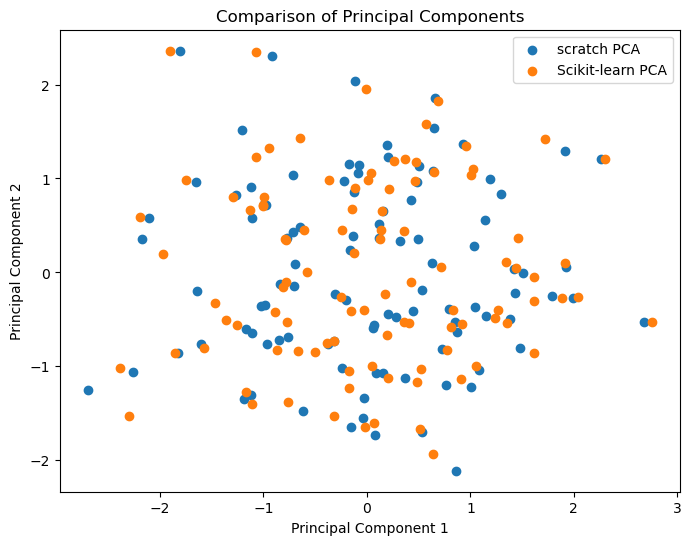

In [115]:
#plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data_scratch[:, 0], transformed_data_scratch[:, 1], label='scratch PCA')
plt.scatter(transformed_data_sklearn[:, 0], transformed_data_sklearn[:, 1], label='Scikit-learn PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Comparison of Principal Components')
plt.legend()
plt.show()

In [116]:
#output explained variance ratio
explained_variance_scratch = np.var(transformed_data_scratch, axis=0) / np.sum(np.var(data, axis=0))
explained_variance_sklearn = sklearn_pca.explained_variance_ratio_
print("\nExplained Variance Ratio (scratch PCA):", explained_variance_scratch)
print("Explained Variance Ratio (sklearn PCA):", explained_variance_sklearn)


Explained Variance Ratio (scratch PCA): [0.38588361 0.31688105]
Explained Variance Ratio (sklearn PCA): [0.38880102 0.3171578 ]


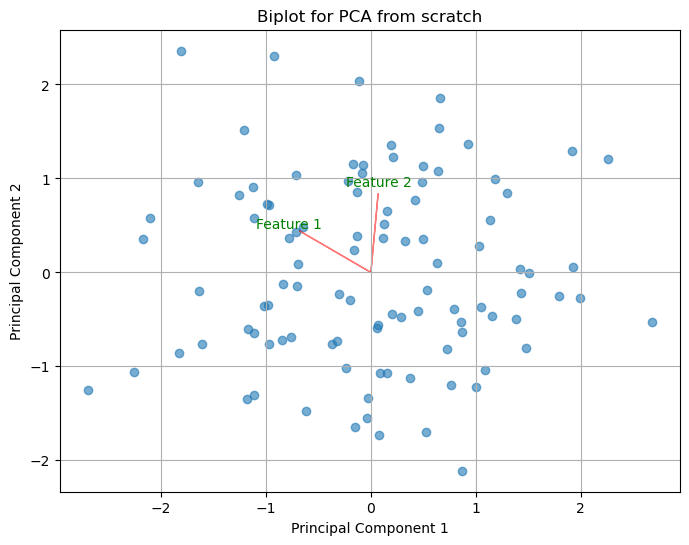

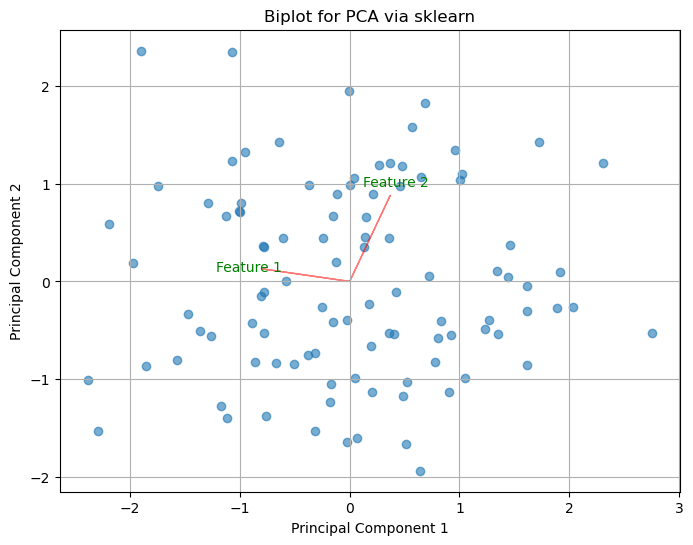

In [117]:
#make function to plot biplot
def plot_biplot(pc1, pc2, labels=None, feature_vectors=None, title=''):
    plt.figure(figsize=(8, 6))
    plt.scatter(pc1, pc2, alpha=0.6)
    if feature_vectors is not None and labels is not None:
        for i, label in enumerate(labels):
            plt.arrow(0, 0, feature_vectors[i, 0], feature_vectors[i, 1], color='r', alpha=0.5)
            plt.text(feature_vectors[i, 0]*1.15, feature_vectors[i, 1]*1.15, label, color='g', ha='center', va='center')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.grid()
    plt.show()

# Plot biplots
plot_biplot(transformed_data_custom[:, 0], transformed_data_custom[:, 1], labels=['Feature 1', 'Feature 2'], feature_vectors=custom_pca.components_.T, title='Biplot for PCA from scratch')
plot_biplot(transformed_data_sklearn[:, 0], transformed_data_sklearn[:, 1], labels=['Feature 1', 'Feature 2'], feature_vectors=sklearn_pca.components_.T[:, :2], title='Biplot for PCA via sklearn')